In [539]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [540]:
# define the palettes
base_color = sns.color_palette()[0]
light_color = sns.color_palette('Paired')[0]

In [541]:
df = pd.read_csv('code_survey.csv', dtype={'age':'str', 'experience': 'str', 'gender': 'str'})
df.head()

,year,age,experience,salary,java,javascript,css,php,python,ruby,...,vue.js,ansible,chef,cryengine,flutter,pandas,puppet,react native,unity 3d,unreal engine
0,2011,< 20,<2,Student / Unemployed,0,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,25-29,41310,NaN,1,0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,25-29,41435,NaN,1,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,< 20,41310,Student / Unemployed,1,0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,35-39,11,"$80,000 - $100,000",1,1,1.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [542]:
# convert salary to category
salary_order = ['Student / Unemployed', 
                'Less than $20,000', 
                '$20,000 - $40,000', 
                '$40,000 - $60,000', 
                '$60,000 - $80,000', 
                '$80,000 - $100,000', 
                '$100,000 - $120,000',
                '$120,000 - $140,000',
                'More than $140,000']
salary_type = pd.api.types.CategoricalDtype(salary_order, ordered=True)
df.salary = df.salary.astype(salary_type)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347687 entries, 0 to 347686
Data columns (total 90 columns):
year             347687 non-null int64
age              250815 non-null object
experience       292946 non-null object
salary           236899 non-null category
java             347687 non-null int64
javascript       347687 non-null int64
css              107911 non-null float64
php              347687 non-null int64
python           347687 non-null int64
ruby             347687 non-null int64
sql              347687 non-null int64
c#               347687 non-null int64
c++              347687 non-null int64
c                347687 non-null int64
perl             241419 non-null float64
objective-c      344874 non-null float64
html             193981 non-null float64
jquery           98625 non-null float64
node.js          338631 non-null float64
gender           273598 non-null object
android          82116 non-null float64
arduino          82116 non-null float64
angular.js  

In [544]:
df.describe()

,year,java,javascript,css,php,python,ruby,sql,c#,c++,...,vue.js,ansible,chef,cryengine,flutter,pandas,puppet,react native,unity 3d,unreal engine
count,347687.000000,347687.000000,347687.000000,107911.000000,347687.000000,347687.000000,347687.000000,347687.000000,347687.000000,347687.000000,...,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000,88883.000000
mean,2017.168051,0.347528,0.544142,0.511153,0.240006,0.290963,0.079623,0.446810,0.281817,0.196614,...,0.108806,0.061924,0.016606,0.003870,0.022614,0.083784,0.017517,0.069001,0.074559,0.023120
std,1.768113,0.476186,0.498048,0.499878,0.427087,0.454207,0.270710,0.497163,0.449885,0.397438,...,0.311397,0.241019,0.127791,0.062091,0.148670,0.277066,0.131190,0.253457,0.262679,0.150286
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
# identify the tech and non tech columns
non_tech_cols = ['year', 'age', 'experience', 'salary', 'gender']
tech_cols = [x for x in df.columns if x not in non_tech_cols]

## Data Analysis

### Q1: What are the most popular languages in the last 9 years?

In [546]:
# Taking a mean of languages over all the 9 years will skew the data as there is a lot more data in the latter years
# Hence we will take a mean of the data every year, and then take a mean of this
df_means = df.groupby('year').agg(['mean'])
df_means.columns = df_means.columns.get_level_values(0)
df_means.head()

,java,javascript,css,php,python,ruby,sql,c#,c++,c,...,vue.js,ansible,chef,cryengine,flutter,pandas,puppet,react native,unity 3d,unreal engine
year,,,,,,,,,,,,,,,,,,,,,
2011,0.306079,0.504444,0.482048,0.280128,0.204408,0.101315,0.573409,0.480626,0.263064,0.263420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.376101,0.500881,0.452347,0.308345,0.193817,0.092424,0.527631,0.395323,0.244434,0.237706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.309998,0.486040,NaN,0.238555,0.192979,0.081503,0.471464,0.310716,0.174092,0.147403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.324349,0.494963,NaN,0.223734,0.192725,0.077587,0.453618,0.311134,0.185529,0.153605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.315073,0.458560,NaN,0.250288,0.200797,0.067661,0.361842,0.266388,0.185540,0.138465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [547]:
df_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2011 to 2019
Data columns (total 85 columns):
java             9 non-null float64
javascript       9 non-null float64
css              3 non-null float64
php              9 non-null float64
python           9 non-null float64
ruby             9 non-null float64
sql              9 non-null float64
c#               9 non-null float64
c++              9 non-null float64
c                9 non-null float64
perl             6 non-null float64
objective-c      8 non-null float64
html             3 non-null float64
jquery           2 non-null float64
node.js          7 non-null float64
android          2 non-null float64
arduino          2 non-null float64
angular.js       5 non-null float64
cassandra        2 non-null float64
coffeescript     4 non-null float64
cordova          5 non-null float64
clojure          5 non-null float64
cloud            2 non-null float64
dart             4 non-null float64
f#               5 non-null f

In [548]:
# checking for some popular languages that don't appear every year
df_means.perl

year
2011    0.100960
2012    0.073843
2013         NaN
2014         NaN
2015    0.028291
2016    0.028984
2017    0.030841
2018    0.033180
2019         NaN
Name: perl, dtype: float64

In [549]:
df_means['node.js']

year
2011         NaN
2012         NaN
2013    0.061486
2014    0.083868
2015    0.111899
2016    0.151865
2017    0.185282
2018    0.258945
2019    0.328601
Name: node.js, dtype: float64

In [550]:
df_means['objective-c']

year
2011         NaN
2012    0.096909
2013    0.098029
2014    0.088316
2015    0.065897
2016    0.057148
2017    0.045708
2018    0.055738
2019    0.047152
Name: objective-c, dtype: float64

### How many respondents were there in each year of the survey?

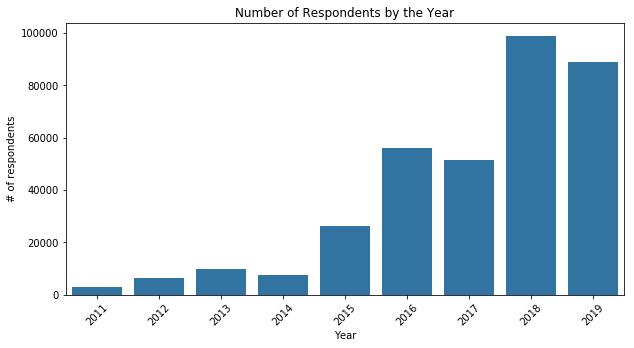

In [551]:
# df.groupby('year').year.agg(['count'])
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year', color=base_color)
plt.title('Number of Respondents by the Year')
plt.xlabel('Year')
plt.ylabel('# of respondents')
plt.xticks(rotation=45)
plt.show();

### How many languages did we survey in each year?

In [552]:
# Melt the data so that we have all the languages in one column
df_melt = pd.melt(df, id_vars=['year','age','experience','gender','salary'], var_name='language', value_name='usage')

In [553]:
# drop the rows where the usage is not nan
# TODO: Maybe we can even filter out usage == 0?
df_melt = df_melt[df_melt.usage.notna()]

In [554]:
# now check for how many languages in each year
df_lang_counts = df_melt.groupby('year').language.unique().apply(lambda x: len(x))
df_lang_counts = df_lang_counts.reset_index()

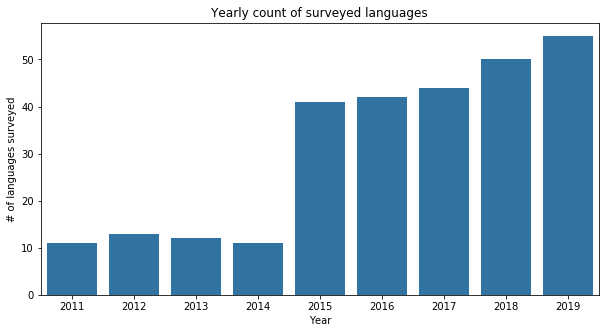

In [555]:
# Plot the yearly count
plt.figure(figsize=(10,5))
sns.barplot(data=df_lang_counts, x='year', y='language', color=base_color)
plt.title('Yearly count of surveyed languages')
plt.xlabel('Year')
plt.ylabel('# of languages surveyed')
plt.show();

In [556]:
# In order to get good data, let us consider only the last 5 years
# where a healthy number of languages were surveyed as well as there was a higher count of respondents
df_means_from_2015 = df_means.loc[2015:2019]

In [557]:
df_means_from_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2015 to 2019
Data columns (total 85 columns):
java             5 non-null float64
javascript       5 non-null float64
css              1 non-null float64
php              5 non-null float64
python           5 non-null float64
ruby             5 non-null float64
sql              5 non-null float64
c#               5 non-null float64
c++              5 non-null float64
c                5 non-null float64
perl             4 non-null float64
objective-c      5 non-null float64
html             2 non-null float64
jquery           1 non-null float64
node.js          5 non-null float64
android          2 non-null float64
arduino          2 non-null float64
angular.js       5 non-null float64
cassandra        2 non-null float64
coffeescript     4 non-null float64
cordova          5 non-null float64
clojure          5 non-null float64
cloud            2 non-null float64
dart             4 non-null float64
f#               5 non-null f

In [558]:
# We also don't want to consider a language when it is not a part of the survey of a given year 
# as that will bring down the means. So consider only the languages present in all 5 years
df_means_5_years = df_means_from_2015.dropna(axis=1)

# we'll also collect the data which is present for at least 3/5 years for later use
df_means_3_years = df_means_from_2015.dropna(axis=1, thresh=3)

In [559]:
df_overall_mean = df_means_5_years.mean().sort_values(ascending=False)
df_overall_mean

javascript     0.522375
sql            0.421152
java           0.336265
python         0.272972
c#             0.271888
php            0.236242
node.js        0.207318
c++            0.189459
angular.js     0.171141
c              0.159283
ruby           0.076237
objective-c    0.054329
swift          0.050528
go             0.042519
r              0.039069
cordova        0.037565
scala          0.029302
hadoop         0.022079
spark          0.019674
rust           0.014009
clojure        0.009765
f#             0.009285
dtype: float64

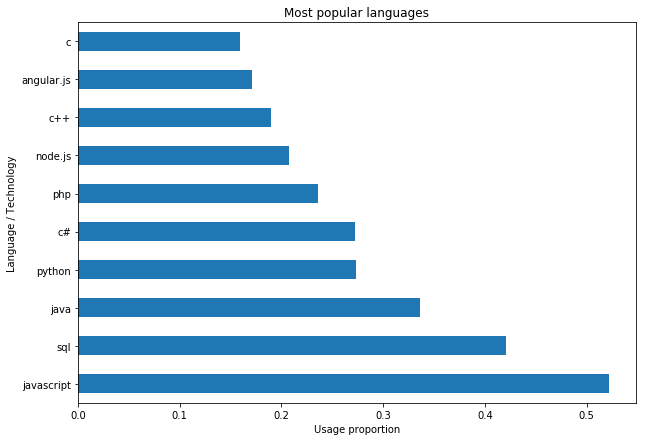

In [560]:
# plot of the distribution of the top 10 languages
plt.figure(figsize=(10,7))
df_overall_mean[0:10].plot(kind='barh', color=base_color)
plt.ylabel('Language / Technology')
plt.xlabel('Usage proportion')
plt.title('Most popular languages')
plt.show();

### Q2: Which languages have dropped out and which have added in in the last 5 years?

In [561]:
langs_3_years = [x for x in df_means_3_years.columns if x not in df_means_5_years.columns]

In [562]:
df_3_years_diff = df_means_3_years.filter(items=langs_3_years)

In [563]:
# get the overall means for 3 years to get the sorted order of languages
lang_order_3yrs_diff = df_3_years_diff.mean().sort_values(ascending=False).index

In [564]:
# melt the distribution of languages
df_3_years_diff.reset_index(inplace=True)
df_3_years_diff = df_3_years_diff.melt(id_vars='year', var_name='language', value_name='usage')

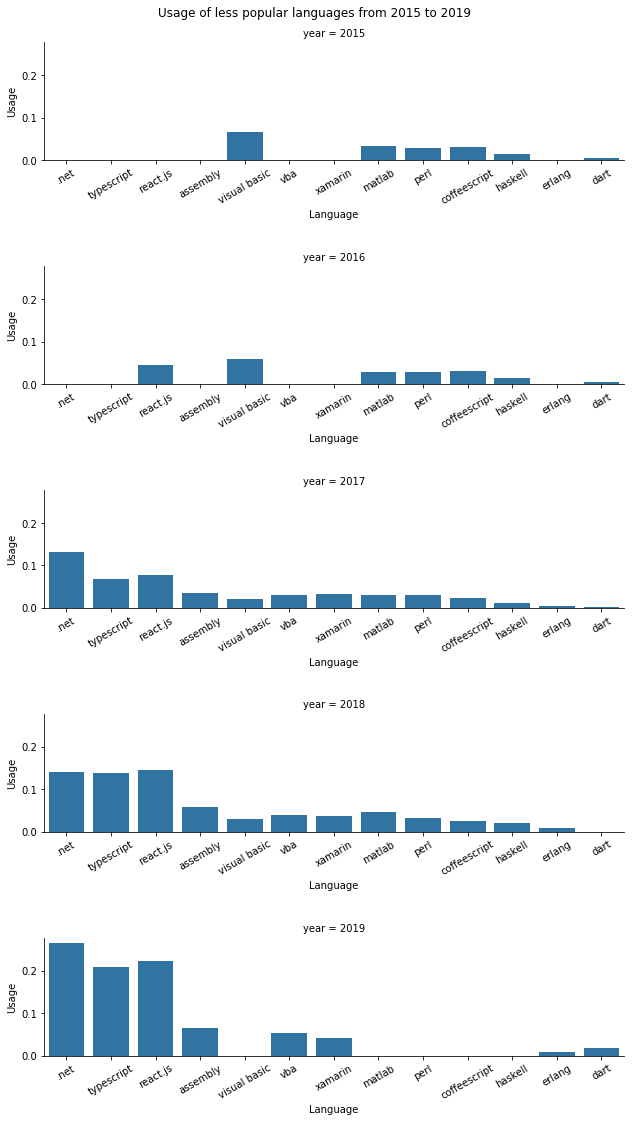

In [565]:
g = sns.FacetGrid(df_3_years_diff, row='year', height=3, aspect=3)
g.map(sns.barplot, 'language', 'usage', color=base_color, order=lang_order_3yrs_diff)

# get labels from the last facet
labels = g.axes.flat[-1].get_xticklabels()

# add labels to the grid
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_ylabel('Usage')
    ax.set_xlabel('Language')
    
# plt.gcf().subplots_adjust(top=0.9)    
g.fig.suptitle('Usage of less popular languages from 2015 to 2019', y=1.01)
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout();    
plt.show();

In [566]:
# checking if the top 3 upcoming languages were present before 2015
df_means[['.net','typescript', 'react.js']]

,.net,typescript,react.js
year,,,
2011,NaN,NaN,NaN
2012,NaN,NaN,NaN
2013,NaN,NaN,NaN
2014,NaN,NaN,NaN
2015,NaN,NaN,NaN
2016,NaN,NaN,0.045351
2017,0.131596,0.067870,0.076919
2018,0.141885,0.137838,0.145031
2019,0.264460,0.208398,0.223631


In [567]:
# Looking at the means including the ones from 3 years
df_overall_3yrs_mean = df_means_3_years.mean().sort_values(ascending=False)

In [568]:
# prepare color palette for this graph
cust_colors = [base_color for x in range(13)]
cust_colors[-1] = light_color
cust_colors[-2] = light_color
cust_colors[-5] = light_color

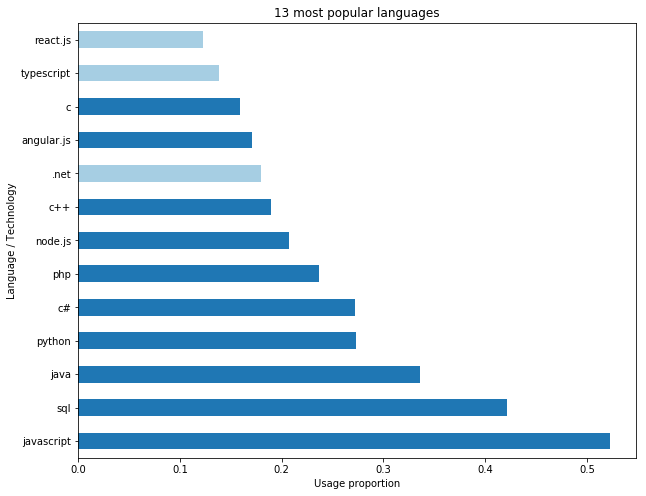

In [569]:
# plot of the distribution of the top 10 languages
plt.figure(figsize=(10,8))
df_overall_3yrs_mean[0:13].plot(kind='barh', color=cust_colors)
plt.ylabel('Language / Technology')
plt.xlabel('Usage proportion')
plt.title('13 most popular languages')
plt.show();

### What is the growth of the languages over the years

In [570]:
# get the order of the languages as the order in the first year of the plot
lang_order_3yrs = df_means_3_years.loc[2015].sort_values(ascending=False).index
lang_order_3yrs = list(lang_order_3yrs[0:13])

# also get the languages in the last year and add to the list at the end
lang_order_5yrs = df_means_3_years.loc[2019].sort_values(ascending=False).index
lang_order_5yrs = list(lang_order_5yrs[0:13])

# now we'll have the top 13 langs in 2015 as well as the top 13 langs in 2019
# we'll know which dropped off in between and which entered 
lang_order = lang_order_3yrs + [x for x in lang_order_5yrs if x not in lang_order_3yrs]

In [571]:
# melt the distribution of languages
df_3_years = df_means_3_years.filter(lang_order)
df_3_years.reset_index(inplace=True)
df_3_years = df_3_years.melt(id_vars='year', var_name='language', value_name='usage')

In [572]:
lang_order_3yrs_type = pd.api.types.CategoricalDtype(lang_order, ordered=True)
df_3_years.language = df_3_years.language.astype(lang_order_3yrs_type)

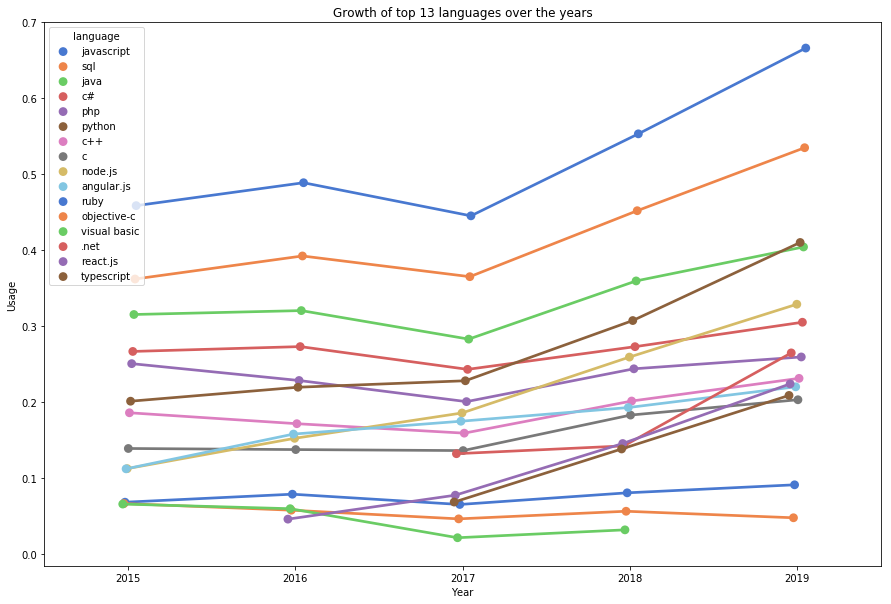

In [573]:
# Plot the growth of each language over the years
plt.figure(figsize=(15,10))
ax = sns.pointplot(data=df_3_years, x='year', y='usage', hue='language',
              dodge=-0.1, palette='muted', scale=1.0)

plt.title('Growth of top 13 languages over the years')
plt.xlabel('Year')
plt.ylabel('Usage')
# plt.legend(title='Language').remove()
plt.show();

### Q4: In terms of the pay scale, which are the top 3 languages at the highest and lowest ranges for compensation?

In [574]:
df_melt.salary.unique()

[Student / Unemployed, NaN, $80,000 - $100,000, $20,000 - $40,000, $60,000 - $80,000, $40,000 - $60,000, More than $140,000, $100,000 - $120,000, Less than $20,000, $120,000 - $140,000]
Categories (9, object): [Student / Unemployed < Less than $20,000 < $20,000 - $40,000 < $40,000 - $60,000 ... $80,000 - $100,000 < $100,000 - $120,000 < $120,000 - $140,000 < More than $140,000]

In [575]:
# using only data from 2017 and later
df_melt_latest = df_melt.query('year > 2016')

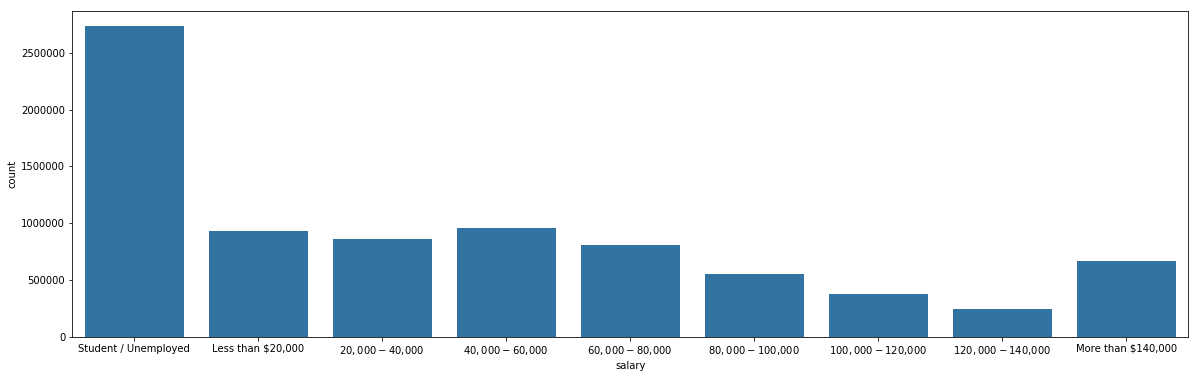

In [576]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_melt_latest, x='salary', color=base_color)
plt.show();

In [577]:
# filter for the top and bottom salaries (using 120-140k as the top salary too)
df_top_salary = df_melt.query('salary == "More than $140,000" or salary == "Less than $20,000" or salary == "$120,000 - $140,000"')
df_top_salary = df_top_salary.drop(columns=['age','experience','gender'])

# merge the top 2 salary values
df_top_salary.salary = df_top_salary.salary.replace({'$120,000 - $140,000': 'More than $120,000', 
                              'More than $140,000': 'More than $120,000'})

In [578]:
# now calculate the usage means of the top and bottom salary
df_top_salary_means = df_top_salary.groupby(['salary', 'language']).usage.agg('mean')
df_top_salary_means = df_top_salary_means.reset_index()
# df_salary_langs = df_top_salary_means.nlargest(20,'usage').sort_values(by=['salary','usage'], ascending=False)

# get the top 10 salaries for the highest and lowest range and then merge them
df_low_sal = df_top_salary_means.query('salary == "Less than $20,000"').nlargest(20, 'usage')
df_high_sal = df_top_salary_means.query('salary == "More than $120,000"').nlargest(20, 'usage')
df_salary_langs = pd.concat([df_low_sal, df_high_sal])

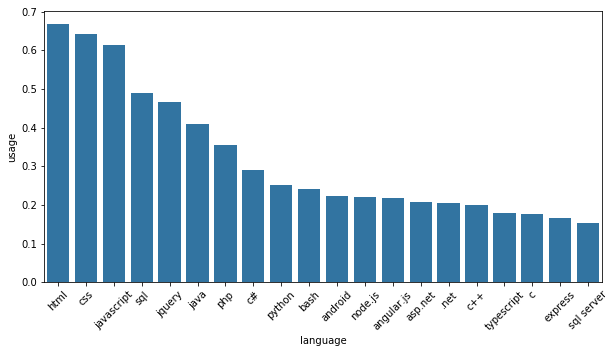

In [587]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_low_sal, x='language', y='usage', color=base_color);
plt.xticks(rotation=45)
plt.show();

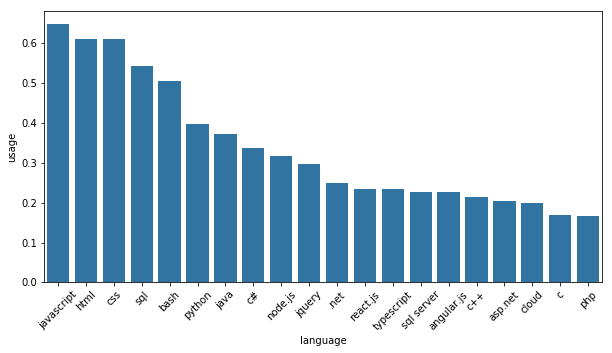

In [588]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_high_sal, x='language', y='usage', color=base_color);
plt.xticks(rotation=45)
plt.show();

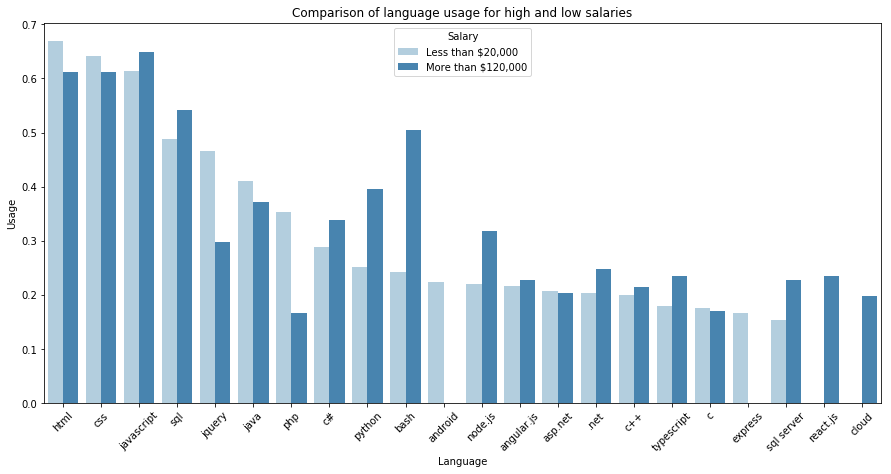

In [581]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_salary_langs, hue='salary', x='language', y='usage', 
            hue_order=['Less than $20,000', 'More than $120,000'], palette='Blues')
plt.title('Comparison of language usage for high and low salaries')
plt.xlabel('Language')
plt.ylabel('Usage')
plt.legend(title='Salary')
plt.xticks(rotation=45)
plt.show();

In [582]:
df_top_salary_means.query('language == "ansible"')

,salary,language,usage
3,"Less than $20,000",ansible,0.030708
88,"More than $120,000",ansible,0.103455


In [583]:
# Let us normalize all the usages with respect to the highest usage
df_sal_use_norm = df_top_salary_means.copy()
# df_sal_use_norm.usage = df_sal_use_norm.usage / df_sal_use_norm.usage.max() * 100

# the score is the usage of high salary minus usage of low salary as a 
df_sal_use_norm = df_sal_use_norm.sort_values(by=['language','salary']).groupby(['language']).apply(
    lambda x: (x.iloc[1,2] - x.iloc[0,2]) / x.iloc[1,2]).reset_index().rename(columns={0:'usage_diff'})

In [584]:
# consider only largest absolute differences
df_norm = df_sal_use_norm.query('usage_diff < -0.4 or usage_diff > .7')
df_norm = df_norm.set_index('language')
df_norm.shape

(29, 1)

In [585]:
# colors for usage graph
red_color = sns.color_palette("Paired")[4]
green_color = sns.color_palette("Paired")[2]
diff_use_color_map = df_norm.usage_diff.map(lambda x: green_color if x > 0 else red_color)

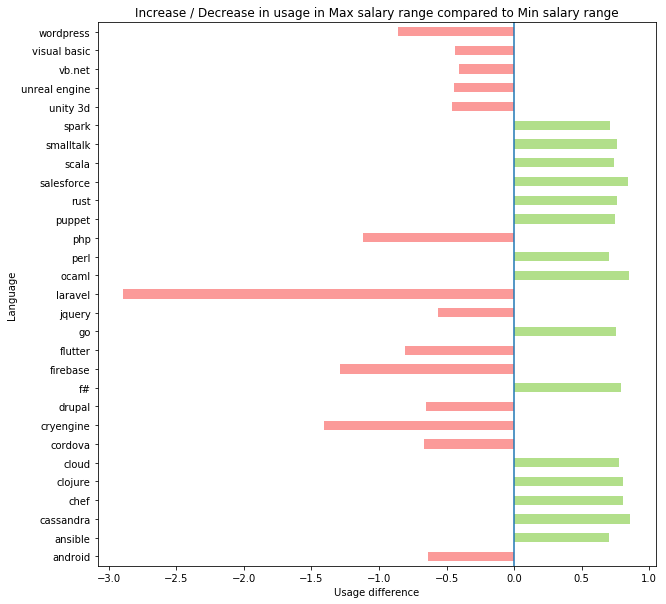

In [586]:
# plot the usage difference
df_norm.plot(kind='barh', figsize=(10,10), color=[diff_use_color_map])
plt.gca().get_legend().remove()
plt.axvline()
plt.xlabel('Usage difference')
plt.ylabel('Language')
plt.title('Increase / Decrease in usage in Max salary range compared to Min salary range')
plt.show();